In [2]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'



# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events


# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event):
    # Filtrar partículas com pT > 10 GeV para reconstruir jatos
    particles = [p for p in event.particles if p.status == 1]  # Somente partículas finais (status 1)
    
    # Converter partículas para objetos PseudoJet do FastJet
    fj_particles = []
    for p in particles:
        fj_particle = fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        fj_particles.append(fj_particle)

    # Escolher o algoritmo de clustering (anti-kT, por exemplo)
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)  # Radius de 0.4 
    
    # Clustering dos jatos
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(10.0)  # Jatos com pT > 10 GeV 
    # Preencher histogramas de jatos
    njets = len(jets)
    histo_njets.fill(njets)
    
   
    


# Ler eventos do arquivo HEPMC
events = read_hepmc_file(hepmc_file)

# Loop sobre os eventos e realizar a análise
nevt = len(events)
for ievt in range(nevt):
    if ievt % 1000 == 0:
        print(f"Processando evento {ievt} de {nevt}...")

    event = events[ievt]

    # Analisar o evento e preencher os histogramas
    analyze_event(event)




Processando evento 0 de 10000...
Processando evento 1000 de 10000...
Processando evento 2000 de 10000...
Processando evento 3000 de 10000...
Processando evento 4000 de 10000...
Processando evento 5000 de 10000...
Processando evento 6000 de 10000...
Processando evento 7000 de 10000...
Processando evento 8000 de 10000...
Processando evento 9000 de 10000...


Referencia:
https://arxiv.org/pdf/1901.07885

Processando evento 0 de 10000...
Processando evento 1000 de 10000...
Processando evento 2000 de 10000...
Processando evento 3000 de 10000...
Processando evento 4000 de 10000...
Processando evento 5000 de 10000...
Processando evento 6000 de 10000...
Processando evento 7000 de 10000...
Processando evento 8000 de 10000...
Processando evento 9000 de 10000...


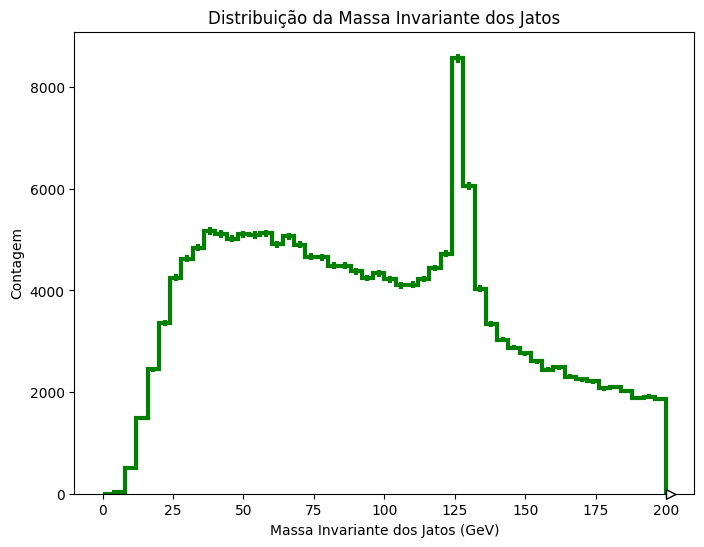

In [3]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histogramas
histo_jets_mass = hist.Hist.new.Reg(50, 0., 200.).Double()  # Massa invariante dos jatos

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular a massa invariante de dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event):
    # Filtrar partículas com pT > 10 GeV para reconstruir jatos
    particles = [p for p in event.particles if p.status == 1]  # Somente partículas finais (status 1)
    
    # Converter partículas para objetos PseudoJet do FastJet
    fj_particles = []
    for p in particles:
        fj_particle = fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        fj_particles.append(fj_particle)

    # Escolher o algoritmo de clustering (anti-kT, por exemplo)
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)  # Radius de 0.4 
    
    # Clustering dos jatos
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(10.0)  # Jatos com pT > 10 GeV 

    # Preencher histograma de massa invariante dos jatos
    if len(jets) >= 2:
        for i in range(len(jets)-1):
            for j in range(i+1, len(jets)):
                mass = invariant_mass(jets[i], jets[j])
                histo_jets_mass.fill(mass)

# Função para visualizar o histograma da massa dos jatos
def plot_histograms():
    plt.figure(figsize=(8, 6))
    histo_jets_mass.plot(ls="-", color="green", lw=3)
    plt.xlabel('Massa Invariante dos Jatos (GeV)')
    plt.ylabel('Contagem')
    plt.title('Distribuição da Massa Invariante dos Jatos')
    plt.show()

# Ler eventos do arquivo HEPMC
events = read_hepmc_file(hepmc_file)

# Loop sobre os eventos e realizar a análise
nevt = len(events)
for ievt in range(nevt):
    if ievt % 1000 == 0:
        print(f"Processando evento {ievt} de {nevt}...")

    event = events[ievt]

    # Analisar o evento e preencher os histogramas
    analyze_event(event)

# Plotar o histograma da massa dos jatos
plot_histograms()


Processando evento 0 de 10000...
Processando evento 1000 de 10000...
Processando evento 2000 de 10000...
Processando evento 3000 de 10000...
Processando evento 4000 de 10000...
Processando evento 5000 de 10000...
Processando evento 6000 de 10000...
Processando evento 7000 de 10000...
Processando evento 8000 de 10000...
Processando evento 9000 de 10000...


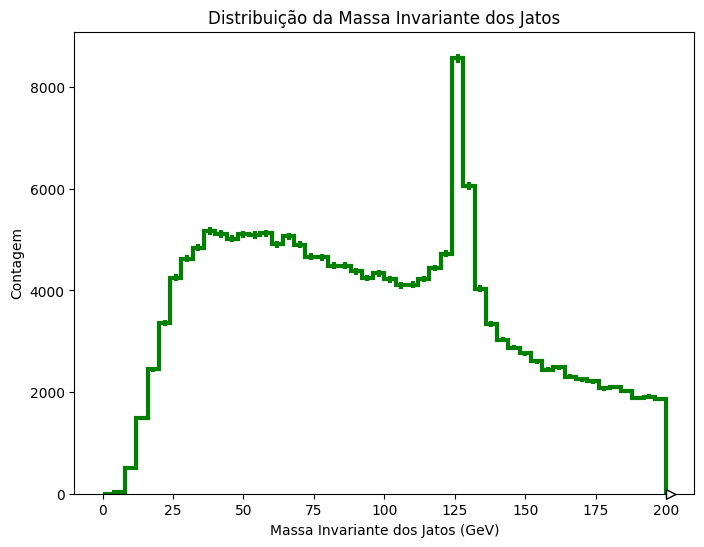

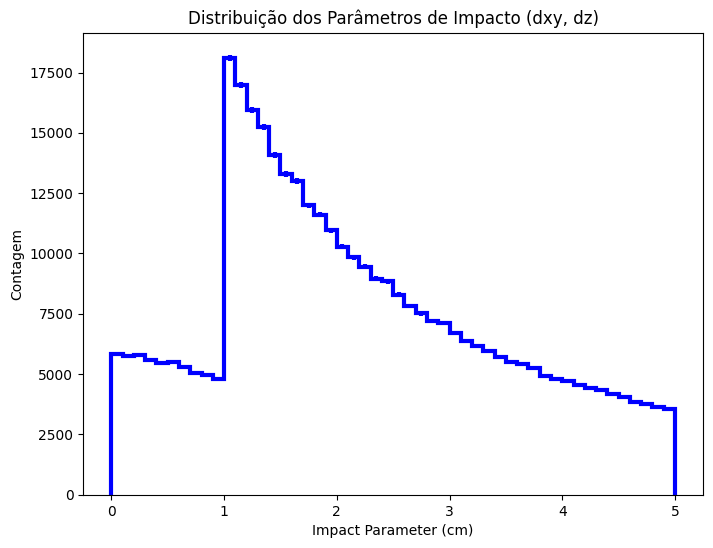

In [27]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histogramas
histo_jets_mass = hist.Hist.new.Reg(50, 0., 200.).Double()  # Massa invariante dos jatos
histo_impact_param = hist.Hist.new.Reg(50, 0., 5.).Double()  # Histogramas para os parâmetros de impacto

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular a massa invariante de dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para calcular os parâmetros de impacto dxy e dz
def impact_parameters(track, primary_vertex):
    # Calcular dxy (distância no plano transverse)
    dx = track.momentum.x - primary_vertex[0]  # Correção: acessar diretamente os atributos
    dy = track.momentum.y - primary_vertex[1]
    dxy = np.sqrt(dx**2 + dy**2)

    # Calcular dz (distância longitudinal)
    dz = track.momentum.z - primary_vertex[2]

    return dxy, dz

# Função para criar o algoritmo de clustering
def create_jet_definition(algorithm='antikt', radius=0.4, p=1):
    """ 
    Cria o objeto de definição de jet com base no algoritmo e parâmetros fornecidos.
    
    Parâmetros:
    algorithm: str - O algoritmo de clustering ('kt', 'antikt' ou 'cambridge')
    radius: float - O raio do cone (R) para o algoritmo
    p: float - Parâmetro que define o comportamento do algoritmo (p=1 para anti-kT)
    
    Retorna:
    JetDefinition - A definição do algoritmo de clustering.
    """
    if algorithm == 'kt':
        return fj.JetDefinition(fj.kt_algorithm, radius, p)
    elif algorithm == 'antikt':
        return fj.JetDefinition(fj.antikt_algorithm, radius)
    elif algorithm == 'cambridge':
        return fj.JetDefinition(fj.cambridge_algorithm, radius)
    else:
        raise ValueError("Algoritmo desconhecido. Use 'kt', 'antikt' ou 'cambridge'.")

# Função para associar faixas a jatos usando um cone ΔR
def associate_tracks_to_jets(tracks, jets, cone_size=0.4):
    associated_tracks = []
    for jet in jets:
        for track in tracks:
            # Calcular distância ΔR entre o jato e a faixa
            track_phi = np.arctan2(track.momentum.y, track.momentum.x)  # Usar diretamente px, py
            track_eta = 0.5 * np.log((np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) + track.momentum.z) / 
                                     (np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) - track.momentum.z))

            jet_phi = jet.phi()
            jet_eta = jet.eta()

            dphi = jet_phi - track_phi
            deta = jet_eta - track_eta
            delta_r = np.sqrt(dphi**2 + deta**2)
            if delta_r < cone_size:
                associated_tracks.append(track)
    return associated_tracks

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event, jet_def, primary_vertex):
    # Filtrar partículas com pT > 10 GeV para reconstruir jatos
    particles = [p for p in event.particles if p.status == 1]  # Somente partículas finais (status 1)
    
    # Converter partículas para objetos PseudoJet do FastJet
    fj_particles = []
    for p in particles:
        # Acesso correto aos componentes do momento
        fj_particle = fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)  # Acesso direto aos atributos
        fj_particles.append(fj_particle)

    # Clustering dos jatos usando o algoritmo definido
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(10.0)  # Jatos com pT > 10 GeV 

    # Associar faixas aos jatos
    tracks = [p for p in event.particles if p.status == 1]  # Considerar todas as partículas do tipo faixa
    associated_tracks = associate_tracks_to_jets(tracks, jets)

    # Filtrar faixas baseadas em parâmetros de impacto (dxy, dz)
    for track in associated_tracks:
        pT = np.sqrt(track.momentum.x**2 + track.momentum.y**2)  # Calcular pT

        # Verificar se a faixa tem pT > 1 GeV (por exemplo)
        if pT > 1.0:  
            dxy, dz = impact_parameters(track, primary_vertex)
            
            # Preencher o histograma de parâmetros de impacto
            if dxy < 5.0:  # Limite de 5 cm para dxy
                histo_impact_param.fill(dxy)
            if np.abs(dz) < 5.0:  # Limite de 5 cm para dz
                histo_impact_param.fill(np.abs(dz))

    # Preencher histograma de massa invariante dos jatos
    if len(jets) >= 2:
        for i in range(len(jets)-1):
            for j in range(i+1, len(jets)):
                mass = invariant_mass(jets[i], jets[j])
                histo_jets_mass.fill(mass)

# Função para visualizar o histograma da massa dos jatos e impacto
def plot_histograms():
    plt.figure(figsize=(8, 6))
    histo_jets_mass.plot(ls="-", color="green", lw=3)
    plt.xlabel('Massa Invariante dos Jatos (GeV)')
    plt.ylabel('Contagem')
    plt.title('Distribuição da Massa Invariante dos Jatos')
    plt.show()

    plt.figure(figsize=(8, 6))
    histo_impact_param.plot(ls="-", color="blue", lw=3)
    plt.xlabel('Impact Parameter (cm)')
    plt.ylabel('Contagem')
    plt.title('Distribuição dos Parâmetros de Impacto (dxy, dz)')
    plt.show()

# Ler eventos do arquivo HEPMC
events = read_hepmc_file(hepmc_file)

# Definir o algoritmo de clustering e o raio
jet_algorithm = 'antikt'  # Pode ser 'kt', 'antikt', ou 'cambridge'
radius = 0.4  # Raio do cone (em unidades de η-φ)
p_value = 1  # Parâmetro p para o algoritmo de clustering (p=1 para anti-kT, p=0 para Cambridge, p<0 para outras variantes)

# Criar a definição do jet
jet_def = create_jet_definition(algorithm=jet_algorithm, radius=radius, p=p_value)

# Definir o vértice primário (exemplo simplificado)
primary_vertex = [0, 0, 0]  # Coordenadas (x, y, z) do vértice primário

# Loop sobre os eventos e realizar a análise
nevt = len(events)
for ievt in range(nevt):
    if ievt % 1000 == 0:
        print(f"Processando evento {ievt} de {nevt}...")

    event = events[ievt]

    # Analisar o evento e preencher os histogramas
    analyze_event(event, jet_def, primary_vertex)

# Plotar os histogramas de massa dos jatos e impacto
plot_histograms()


/home/matheusgeraldes/.local/lib/python3.9/site-packages/mplhep/utils.py:198: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


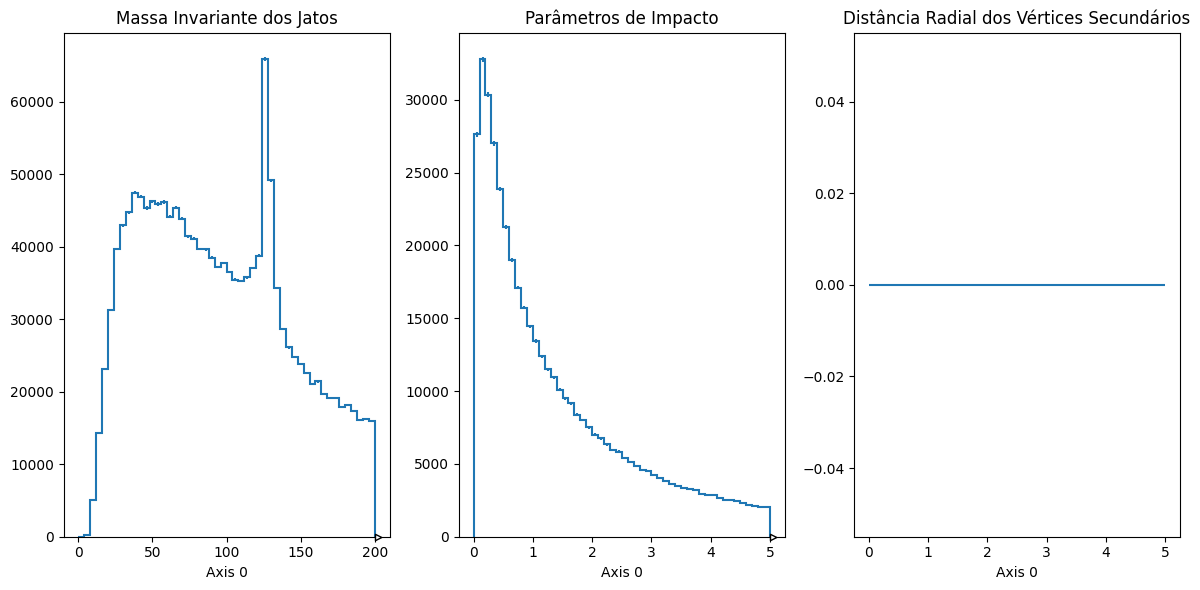

In [19]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histogramas
histo_jets_mass = hist.Hist.new.Reg(50, 0., 200.).Double()  # Massa invariante dos jatos
histo_impact_param = hist.Hist.new.Reg(50, 0., 5.).Double()  # Histogramas para os parâmetros de impacto
histo_secondary_vertex = hist.Hist.new.Reg(50, 0., 5.).Double()  # Para visualizar a distribuição de distâncias radiais dos vértices secundários

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular a massa invariante de dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para calcular os parâmetros de impacto dxy e dz
def impact_parameters(track, primary_vertex):
    # Calcular dxy (distância no plano transverse)
    dx = track.momentum.x - primary_vertex[0]  # Correção: acessar diretamente os atributos
    dy = track.momentum.y - primary_vertex[1]
    dxy = np.sqrt(dx**2 + dy**2)

    # Calcular dz (distância longitudinal)
    dz = track.momentum.z - primary_vertex[2]

    return dxy, dz

# Função para criar o algoritmo de clustering
def create_jet_definition(algorithm='antikt', radius=0.4, p=1):
    """ 
    Cria o objeto de definição de jet com base no algoritmo e parâmetros fornecidos.
    
    Parâmetros:
    algorithm: str - O algoritmo de clustering ('kt', 'antikt' ou 'cambridge')
    radius: float - O raio do cone (R) para o algoritmo
    p: float - Parâmetro que define o comportamento do algoritmo (p=1 para anti-kT)
    
    Retorna:
    JetDefinition - A definição do algoritmo de clustering.
    """
    if algorithm == 'kt':
        return fj.JetDefinition(fj.kt_algorithm, radius, p)
    elif algorithm == 'antikt':
        return fj.JetDefinition(fj.antikt_algorithm, radius)
    elif algorithm == 'cambridge':
        return fj.JetDefinition(fj.cambridge_algorithm, radius)
    else:
        raise ValueError("Algoritmo desconhecido. Use 'kt', 'antikt' ou 'cambridge'.")

# Função para associar faixas a jatos usando um cone ΔR
def associate_tracks_to_jets(tracks, jets, cone_size=0.4):
    associated_tracks = []
    for jet in jets:
        for track in tracks:
            # Calcular distância ΔR entre o jato e a faixa
            track_phi = np.arctan2(track.momentum.y, track.momentum.x)  # Usar diretamente px, py
            track_eta = 0.5 * np.log((np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) + track.momentum.z) / 
                                     (np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) - track.momentum.z))

            jet_phi = jet.phi()
            jet_eta = jet.eta()

            dphi = jet_phi - track_phi
            deta = jet_eta - track_eta
            delta_r = np.sqrt(dphi**2 + deta**2)
            if delta_r < cone_size:
                associated_tracks.append(track)
    return associated_tracks

# Função para calcular a distância radial (em cm) do vértice secundário em relação ao vértice primário
def calculate_radial_distance(secondary_vertex, primary_vertex):
    dx = secondary_vertex[0] - primary_vertex[0]
    dy = secondary_vertex[1] - primary_vertex[1]
    return np.sqrt(dx**2 + dy**2)

# Função para calcular a massa do vértice secundário
def calculate_secondary_vertex_mass(tracks):
    # Suponha que o vértice secundário seja reconstruído a partir de faixas associadas.
    # A massa do vértice secundário pode ser estimada a partir da soma das energias e momentos das faixas.
    E_tot = sum([track.e() for track in tracks])
    px_tot = sum([track.px() for track in tracks])
    py_tot = sum([track.py() for track in tracks])
    pz_tot = sum([track.pz() for track in tracks])
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para identificar vértices secundários válidos
def identify_secondary_vertex(candidates, primary_vertex):
    valid_secondary_vertices = []
    for candidate in candidates:
        # Cálculo da distância radial
        radial_distance = calculate_radial_distance(candidate['vertex'], primary_vertex)
        print(f"Candidado a vértice: {candidate['vertex']} -> Distância radial: {radial_distance}")  # Depuração

        # Rejeitar candidatos com distância radial < 5 cm ou com massa compatível com K0
        if radial_distance < 5.0:
            print(f"Distância radial {radial_distance} é menor que 5 cm, ignorando...")  # Depuração
            continue

        # Cálculo da massa do vértice
        mass = calculate_secondary_vertex_mass(candidate['tracks'])
        print(f"Massa do vértice: {mass}")  # Depuração
        if mass < 6.5:  # Massa mínima de 6.5 GeV/c²
            print(f"Massa {mass} é menor que 6.5 GeV/c², ignorando...")  # Depuração
            continue

        # Verificação da direção do voo dentro do cone de ∆R < 0.5
        direction = candidate['direction']
        # A direção do vértice secundário deve estar no cone ∆R < 0.5 em relação ao jet
        if np.sqrt(direction['deta']**2 + direction['dphi']**2) < 0.5:
            valid_secondary_vertices.append(candidate)
    
    return valid_secondary_vertices

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event, jet_def, primary_vertex):
    # Filtrar partículas com pT > 10 GeV para reconstruir jatos
    particles = [p for p in event.particles if p.status == 1]  # Somente partículas finais (status 1)
    
    # Converter partículas para objetos PseudoJet do FastJet
    fj_particles = []
    for p in particles:
        fj_particle = fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)  # Acesso direto aos atributos
        fj_particles.append(fj_particle)

    # Clustering dos jatos usando o algoritmo definido
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(10.0)  # Jatos com pT > 10 GeV 

    # Associar faixas aos jatos
    tracks = [p for p in event.particles if p.status == 1]  # Considerar todas as partículas do tipo faixa
    associated_tracks = associate_tracks_to_jets(tracks, jets)

    # Candidatos a vértices secundários
    secondary_vertex_candidates = []
    for track in associated_tracks:
        # Acessar o vértice de decaimento da partícula
        end_vertex = track.end_vertex
        if end_vertex is None:
            continue  # Se não tiver vértice de decaimento, ignoramos a partícula

        # Aqui você pode coletar faixas que poderiam formar vértices secundários
        candidate = {'vertex': (end_vertex.position.x, end_vertex.position.y, end_vertex.position.z),
                     'tracks': [track],
                     'direction': {'deta': track.eta(), 'dphi': track.phi()}}
        secondary_vertex_candidates.append(candidate)

    # Identificar vértices secundários válidos
    valid_secondary_vertices = identify_secondary_vertex(secondary_vertex_candidates, primary_vertex)

    # Preencher histogramas
    for jet in jets:
        for i in range(len(jets)-1):
            for j in range(i+1, len(jets)):
                mass = invariant_mass(jets[i], jets[j])
                histo_jets_mass.fill(mass)
    
    # Preencher o histograma de impacto
    for track in associated_tracks:
        dxy, dz = impact_parameters(track, primary_vertex)
        histo_impact_param.fill(dxy)
    
    # Preencher o histograma de vértices secundários
    for vertex in valid_secondary_vertices:
        radial_distance = calculate_radial_distance(vertex['vertex'], primary_vertex)
        histo_secondary_vertex.fill(radial_distance)

# Função para plotar histogramas
def plot_histograms():
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    histo_jets_mass.plot()
    plt.title('Massa Invariante dos Jatos')
    
    plt.subplot(1, 3, 2)
    histo_impact_param.plot()
    plt.title('Parâmetros de Impacto')
    
    plt.subplot(1, 3, 3)
    histo_secondary_vertex.plot()
    plt.title('Distância Radial dos Vértices Secundários')
    
    plt.tight_layout()
    plt.show()

# Carregar eventos
events = read_hepmc_file(hepmc_file)

# Definir o algoritmo de clustering (anti-kT)
jet_def = create_jet_definition(algorithm='antikt', radius=0.4)

# Analisar os eventos
for event in events:
    primary_vertex = (0, 0, 0)  # Exemplo: substitua pelo vértice primário real
    analyze_event(event, jet_def, primary_vertex)

# Plotar os histogramas
plot_histograms()


/home/matheusgeraldes/.local/lib/python3.9/site-packages/mplhep/utils.py:198: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


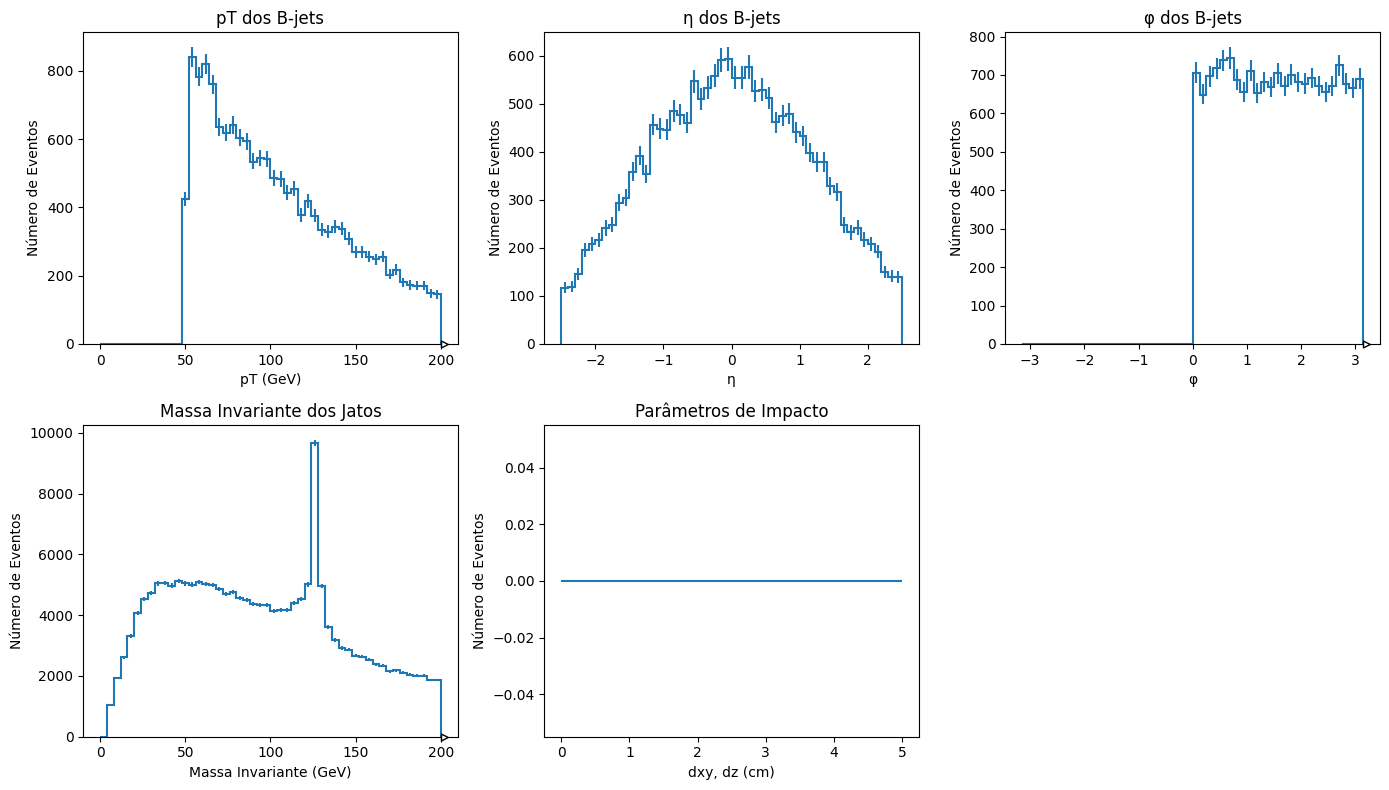

In [25]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histogramas
histo_jets_mass = hist.Hist.new.Reg(50, 0., 200.).Double()  # Massa invariante dos jatos
histo_impact_param = hist.Hist.new.Reg(50, 0., 5.).Double()  # Histogramas para os parâmetros de impacto
histo_bjet_pT = hist.Hist.new.Reg(50, 0., 200.).Double()  # pT dos B-jets
histo_bjet_eta = hist.Hist.new.Reg(50, -2.5, 2.5).Double()  # η dos B-jets
histo_bjet_phi = hist.Hist.new.Reg(50, -np.pi, np.pi).Double()  # φ dos B-jets

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular a massa invariante de dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para calcular os parâmetros de impacto dxy e dz
def impact_parameters(track, primary_vertex):
    # Calcular dxy (distância no plano transverse)
    dx = track.momentum.x - primary_vertex[0]  # Correção: acessar diretamente os atributos
    dy = track.momentum.y - primary_vertex[1]
    dxy = np.sqrt(dx**2 + dy**2)

    # Calcular dz (distância longitudinal)
    dz = track.momentum.z - primary_vertex[2]

    return dxy, dz

# Função para identificar se o jet é um B-jet com base em suas características
def is_b_jet(jet, primary_vertex, tracks, radius=0.4):
    # Calcula o pT do jet
    pT = jet.pt()

    if pT < 50.0:  # Rejeita jatos com pT menor que 50 GeV
        return False
    
    # Calcula a pseudorapidez (η) do jet
    eta = jet.eta()

    if np.abs(eta) > 2.5:  # Rejeita jatos com |η| maior que 2.5
        return False

    # Verifica se o jet possui um vértice secundário
    associated_tracks = associate_tracks_to_jets(tracks, [jet], cone_size=radius)

    # Verifica se algum track associado possui parâmetros de impacto grandes
    for track in associated_tracks:
        dxy, dz = impact_parameters(track, primary_vertex)
        if dxy > 0.1 or np.abs(dz) > 0.5:  # Parâmetros de impacto típicos para B-jets
            return True  # Considera como B-jet se encontrar impacto significativo

    return False  # Caso contrário, não é um B-jet

# Função para criar o algoritmo de clustering
def create_jet_definition(algorithm='kt', radius=0.4, p=1):
    if algorithm == 'kt':
        return fj.JetDefinition(fj.kt_algorithm, radius, p)
    elif algorithm == 'antikt':
        return fj.JetDefinition(fj.antikt_algorithm, radius)
    elif algorithm == 'cambridge':
        return fj.JetDefinition(fj.cambridge_algorithm, radius)
    else:
        raise ValueError("Algoritmo desconhecido. Use 'kt', 'antikt' ou 'cambridge'.")

# Função para associar faixas a jatos usando um cone ΔR
def associate_tracks_to_jets(tracks, jets, cone_size=0.4):
    associated_tracks = []
    for jet in jets:
        for track in tracks:
            # Calcular distância ΔR entre o jato e a faixa
            track_phi = np.arctan2(track.momentum.y, track.momentum.x)
            track_eta = 0.5 * np.log((np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) + track.momentum.z) / 
                                     (np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) - track.momentum.z))

            jet_phi = jet.phi()
            jet_eta = jet.eta()

            dphi = jet_phi - track_phi
            deta = jet_eta - track_eta
            delta_r = np.sqrt(dphi**2 + deta**2)
            if delta_r < cone_size:
                associated_tracks.append(track)
    return associated_tracks

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event, jet_def, primary_vertex):
    particles = [p for p in event.particles if p.status == 1]
    
    # Converter partículas para objetos PseudoJet do FastJet
    fj_particles = []
    for p in particles:
        fj_particle = fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        fj_particles.append(fj_particle)

    # Clustering dos jatos usando o algoritmo definido
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(10.0)  # Jatos com pT > 10 GeV

    # Associar faixas aos jatos
    tracks = [p for p in event.particles if p.status == 1]
    
    # Identificar B-jets e preencher histogramas
    for jet in jets:
        if is_b_jet(jet, primary_vertex, tracks):
            histo_bjet_pT.fill(jet.pt())
            histo_bjet_eta.fill(jet.eta())
            histo_bjet_phi.fill(jet.phi())
    
    # Preencher histograma de massa invariante dos jatos
    if len(jets) >= 2:
        for i in range(len(jets)-1):
            for j in range(i+1, len(jets)):
                mass = invariant_mass(jets[i], jets[j])
                histo_jets_mass.fill(mass)

# Função para plotar os histogramas
def plot_histograms():
    plt.figure(figsize=(14, 8))  # Tamanho maior para melhor visualização
    
    # pT dos B-jets
    plt.subplot(2, 3, 1)
    histo_bjet_pT.plot()
    plt.title('pT dos B-jets')
    plt.xlabel('pT (GeV)')
    plt.ylabel('Número de Eventos')

    # η dos B-jets
    plt.subplot(2, 3, 2)
    histo_bjet_eta.plot()
    plt.title('η dos B-jets')
    plt.xlabel('η')
    plt.ylabel('Número de Eventos')

    # φ dos B-jets
    plt.subplot(2, 3, 3)
    histo_bjet_phi.plot()
    plt.title('φ dos B-jets')
    plt.xlabel('φ')
    plt.ylabel('Número de Eventos')

    # Massa invariante dos jatos
    plt.subplot(2, 3, 4)
    histo_jets_mass.plot()
    plt.title('Massa Invariante dos Jatos')
    plt.xlabel('Massa Invariante (GeV)')
    plt.ylabel('Número de Eventos')

    # Parâmetros de impacto
    plt.subplot(2, 3, 5)
    histo_impact_param.plot()
    plt.title('Parâmetros de Impacto')
    plt.xlabel('dxy, dz (cm)')
    plt.ylabel('Número de Eventos')

    plt.tight_layout()
    plt.show()

# Carregar eventos
events = read_hepmc_file(hepmc_file)

# Definir o algoritmo de clustering (kt)
jet_def = create_jet_definition(algorithm='kt', radius=0.4)

# Analisar os eventos
for event in events:
    primary_vertex = (0, 0, 0)  # Exemplo: substitua pelo vértice primário real
    analyze_event(event, jet_def, primary_vertex)

# Plotar os histogramas
plot_histograms()


/home/matheusgeraldes/.local/lib/python3.9/site-packages/mplhep/utils.py:198: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


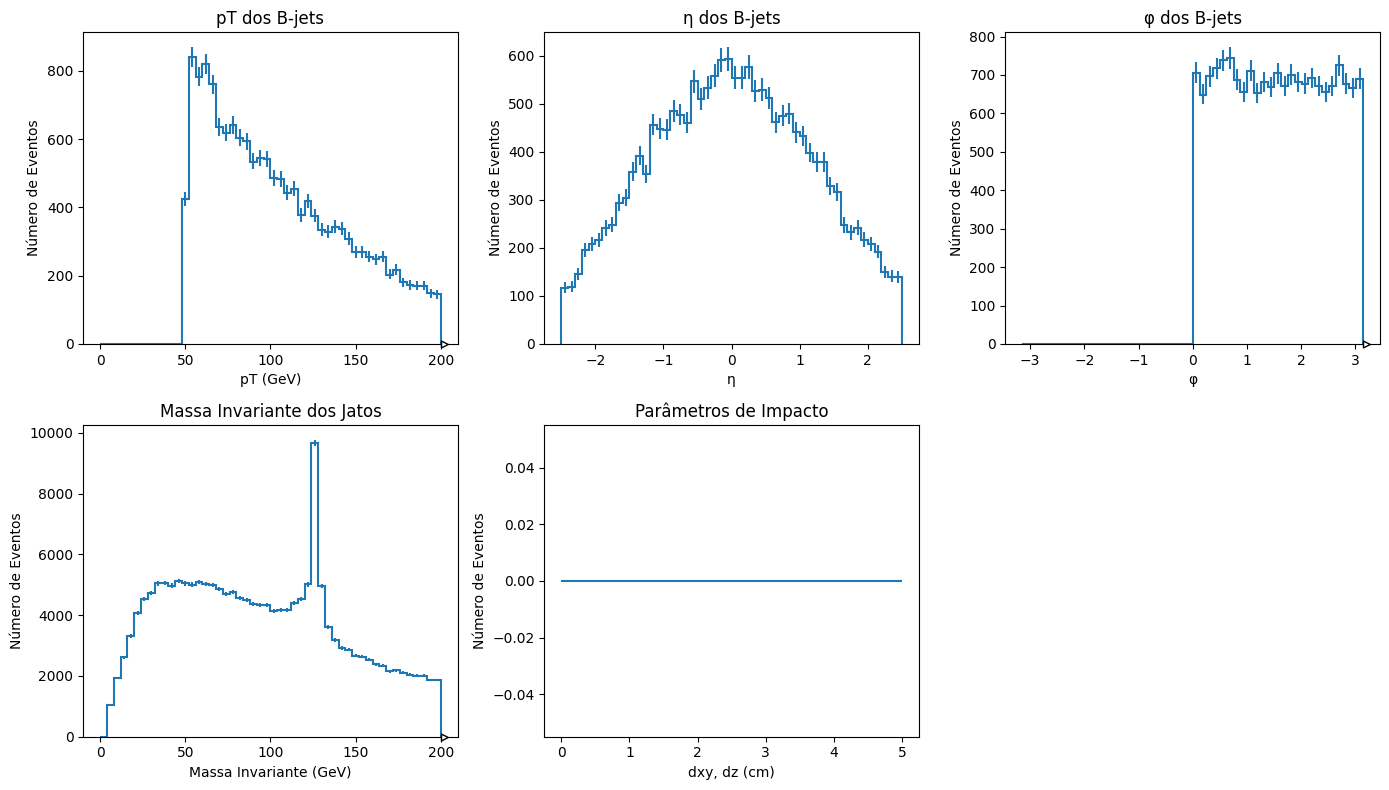

In [26]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histogramas
histo_jets_mass = hist.Hist.new.Reg(50, 0., 200.).Double()  # Massa invariante dos jatos
histo_impact_param = hist.Hist.new.Reg(50, 0., 5.).Double()  # Histogramas para os parâmetros de impacto
histo_bjet_pT = hist.Hist.new.Reg(50, 0., 200.).Double()  # pT dos B-jets
histo_bjet_eta = hist.Hist.new.Reg(50, -2.5, 2.5).Double()  # η dos B-jets
histo_bjet_phi = hist.Hist.new.Reg(50, -np.pi, np.pi).Double()  # φ dos B-jets

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular a massa invariante de dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para calcular os parâmetros de impacto dxy e dz
def impact_parameters(track, primary_vertex):
    # Calcular dxy (distância no plano transverse)
    dx = track.momentum.x - primary_vertex[0]  # Correção: acessar diretamente os atributos
    dy = track.momentum.y - primary_vertex[1]
    dxy = np.sqrt(dx**2 + dy**2)

    # Calcular dz (distância longitudinal)
    dz = track.momentum.z - primary_vertex[2]

    return dxy, dz

# Função para identificar se o jet é um B-jet com base em suas características
def is_b_jet(jet, primary_vertex, tracks, radius=0.4, pT_min=50.0, eta_max=2.5, dxy_max=0.1, dz_max=0.5):
    # Calcula o pT do jet
    pT = jet.pt()

    # Aplicar corte de pT
    if pT < pT_min:
        return False
    
    # Calcula a pseudorapidez (η) do jet
    eta = jet.eta()

    # Aplicar corte de η
    if np.abs(eta) > eta_max:
        return False

    # Verifica se o jet possui um vértice secundário
    associated_tracks = associate_tracks_to_jets(tracks, [jet], cone_size=radius)

    # Verifica se algum track associado possui parâmetros de impacto grandes
    for track in associated_tracks:
        dxy, dz = impact_parameters(track, primary_vertex)
        if dxy > dxy_max or np.abs(dz) > dz_max:  # Parâmetros de impacto típicos para B-jets
            return True  # Considera como B-jet se encontrar impacto significativo

    return False  # Caso contrário, não é um B-jet

# Função para criar o algoritmo de clustering
def create_jet_definition(algorithm='kt', radius=0.4, p=1):
    if algorithm == 'kt':
        return fj.JetDefinition(fj.kt_algorithm, radius, p)
    elif algorithm == 'antikt':
        return fj.JetDefinition(fj.antikt_algorithm, radius)
    elif algorithm == 'cambridge':
        return fj.JetDefinition(fj.cambridge_algorithm, radius)
    else:
        raise ValueError("Algoritmo desconhecido. Use 'kt', 'antikt' ou 'cambridge'.")

# Função para associar faixas a jatos usando um cone ΔR
def associate_tracks_to_jets(tracks, jets, cone_size=0.4):
    associated_tracks = []
    for jet in jets:
        for track in tracks:
            # Calcular distância ΔR entre o jato e a faixa
            track_phi = np.arctan2(track.momentum.y, track.momentum.x)
            track_eta = 0.5 * np.log((np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) + track.momentum.z) / 
                                     (np.sqrt(track.momentum.x**2 + track.momentum.y**2 + track.momentum.z**2) - track.momentum.z))

            jet_phi = jet.phi()
            jet_eta = jet.eta()

            dphi = jet_phi - track_phi
            deta = jet_eta - track_eta
            delta_r = np.sqrt(dphi**2 + deta**2)
            if delta_r < cone_size:
                associated_tracks.append(track)
    return associated_tracks

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event, jet_def, primary_vertex, pT_min=50.0, eta_max=2.5, dxy_max=0.1, dz_max=0.5):
    particles = [p for p in event.particles if p.status == 1]
    
    # Converter partículas para objetos PseudoJet do FastJet
    fj_particles = []
    for p in particles:
        fj_particle = fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        fj_particles.append(fj_particle)

    # Clustering dos jatos usando o algoritmo definido
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(10.0)  # Jatos com pT > 10 GeV

    # Associar faixas aos jatos
    tracks = [p for p in event.particles if p.status == 1]
    
    # Identificar B-jets e preencher histogramas
    for jet in jets:
        if is_b_jet(jet, primary_vertex, tracks, pT_min=pT_min, eta_max=eta_max, dxy_max=dxy_max, dz_max=dz_max):
            histo_bjet_pT.fill(jet.pt())
            histo_bjet_eta.fill(jet.eta())
            histo_bjet_phi.fill(jet.phi())
    
    # Preencher histograma de massa invariante dos jatos
    if len(jets) >= 2:
        for i in range(len(jets)-1):
            for j in range(i+1, len(jets)):
                mass = invariant_mass(jets[i], jets[j])
                histo_jets_mass.fill(mass)

# Função para plotar os histogramas
def plot_histograms():
    plt.figure(figsize=(14, 8))  # Tamanho maior para melhor visualização
    
    # pT dos B-jets
    plt.subplot(2, 3, 1)
    histo_bjet_pT.plot()
    plt.title('pT dos B-jets')
    plt.xlabel('pT (GeV)')
    plt.ylabel('Número de Eventos')

    # η dos B-jets
    plt.subplot(2, 3, 2)
    histo_bjet_eta.plot()
    plt.title('η dos B-jets')
    plt.xlabel('η')
    plt.ylabel('Número de Eventos')

    # φ dos B-jets
    plt.subplot(2, 3, 3)
    histo_bjet_phi.plot()
    plt.title('φ dos B-jets')
    plt.xlabel('φ')
    plt.ylabel('Número de Eventos')

    # Massa invariante dos jatos
    plt.subplot(2, 3, 4)
    histo_jets_mass.plot()
    plt.title('Massa Invariante dos Jatos')
    plt.xlabel('Massa Invariante (GeV)')
    plt.ylabel('Número de Eventos')

    # Parâmetros de impacto
    plt.subplot(2, 3, 5)
    histo_impact_param.plot()
    plt.title('Parâmetros de Impacto')
    plt.xlabel('dxy, dz (cm)')
    plt.ylabel('Número de Eventos')

    plt.tight_layout()
    plt.show()

# Carregar eventos
events = read_hepmc_file(hepmc_file)

# Definir o algoritmo de clustering (kt)
jet_def = create_jet_definition(algorithm='kt', radius=0.4)

# Analisar os eventos
for event in events:
    primary_vertex = (0, 0, 0)  # Exemplo: substitua pelo vértice primário real
    analyze_event(event, jet_def, primary_vertex)

# Plotar os histogramas
plot_histograms()
